## Report for the LJMD Project

This report outlines the approach taken to benchmark the LJMD code and presents the corresponding findings. The benchmarking process involved three distinct tasks: (1) refactoring and optimizing for single-core performance, which was assigned to Neeraj Kulhari; (2) MPI parallelization, which was assigned to Iara Ota; and (3) OMP parallelization, which was assigned to Andrea S.

### Optimization of the Serial Code

> The initial step in our performance optimization process involved the utilization of compiler optimization flags. 

> Specifically, we increased the optimization level from -O2 to -O3 and included the flags -fomit-frame-pointer and -msse3.

> Subsequently, we explored additional optimization techniques, such as substituting computationally expensive mathematical operations with faster alternatives (e.g., minimizing the number of calls to the sqrt function and division operations).

> Additionally, we aimed to improve the data structure to enhance memory access and prevent memory aliasing. Loop unrolling was employed in the azzero function, and we introduced prefactors in the ekin, verlet, and force functions to eliminate repetitive operations. 

> In the final stage of optimization, we leveraged our physical understanding of the system to further refine the force calculation process. Specifically, we applied Newton's third law to optimize the calculation of the pairwise interaction force between particles. This involved updating the force calculation such that each force calculation between two particles is only computed once, which significantly reduced the total number of calculations and subsequently improved runtime.

> Finally, we present the runtime results for the Argon_108 and Argon_2916 simulations at each stage of optimization, indicating that the overall runtime reduced significantly as we implemented each optimization technique. Our findings suggest that implementing a combination of these optimization techniques can significantly improve the performance of LJMD code.

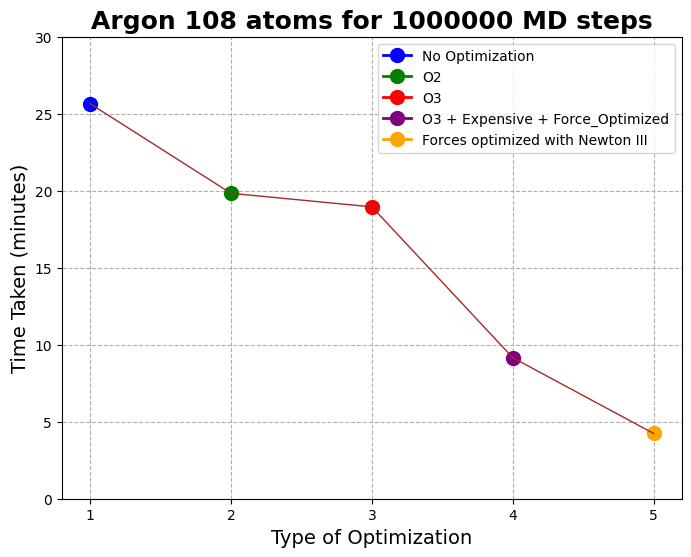

In [7]:
import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = [1, 2, 3, 4, 5]
y_values = [1539.080, 1189.907, 1137.080 , 549.369, 254.153]  # Replace with actual time measurements it is in seconds
# convert to minutes
y_values = [x / 60 for x in y_values]

# Define the colors for each value of the x-axis
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line chart with different colors for each value of the x-axis
for i in range(len(x_values)):
    ax.plot(x_values[i], y_values[i], marker='o', color=colors[i], linewidth=2, markersize=10)

#Join the dots with a line
ax.plot(x_values, y_values, color='brown', linewidth=1)

# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Type of Optimization', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
ax.set_ylim(bottom=0, top=30)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)
#ax.set_xticklabels(['Original', 'O2', 'O3', 'O3 + Math/Forces', 'Forces optimized with Newton'], fontsize=12)

# Set the chart title and font size
ax.set_title('Argon 108 atoms for 1000000 MD steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Add a legend
ax.legend(['No Optimization', 'O2', 'O3', 'O3 + Expensive + Force_Optimized', 'Forces optimized with Newton III '], loc='best', fontsize=10)

# Show the chart
plt.show()

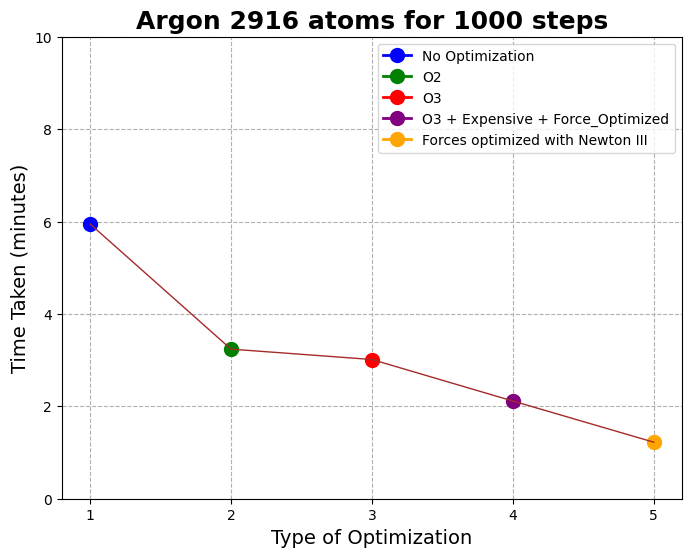

In [8]:
import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = [1, 2, 3, 4, 5]
y_values = [356.85 , 194.28, 180.80, 126.90 , 73.456]  # Replace with actual time measurements it is in seconds
# convert to minutes
y_values = [x / 60 for x in y_values]

# Define the colors for each value of the x-axis
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the line chart with different colors for each value of the x-axis
for i in range(len(x_values)):
    ax.plot(x_values[i], y_values[i], marker='o', color=colors[i], linewidth=2, markersize=10)

#Join the dots with a line
ax.plot(x_values, y_values, color='brown', linewidth=1)

# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Type of Optimization', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
ax.set_ylim(bottom=0, top=10)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)
#ax.set_xticklabels(['Original', 'O2', 'O3', 'O3 + Math/Forces', 'Forces optimized with Newton'], fontsize=12)

# Set the chart title and font size
ax.set_title('Argon 2916 atoms for 1000 steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Add a legend
ax.legend(['No Optimization', 'O2', 'O3', 'O3 + Expensive + Force_Optimized', 'Forces optimized with Newton III '], loc='best', fontsize=10)

# Show the chart
plt.show()

The plot shows the time taken for different optimization types to complete a simulation of Argon 108 atoms using **1,000,000 steps**. The time taken for the Newtons Optimized forces was less than a minute for 10,000 steps.

However, if we were to measure the time taken in seconds for fewer steps, the difference in time taken between the optimization types would be very small. This is because the simulation time taken is proportional to the number of steps taken, and the number of steps taken in this case is very large.

Measuring the time taken in seconds could introduce errors due to the limitations of the timing function used and the variation in the computer's processing power. Hence, measuring the time taken in minutes provides a more accurate representation of the time taken for the simulations.


Our optimization efforts have primarily focused on enhancing the force and Verlet functions since these two functions serve as the heart of the LJMD code. Specifically, the force function calculates the forces that particles exert on each other, and the Verlet function integrates the equations of motion to update the positions and velocities of the particles. As such, optimizing these two functions can have a significant impact on the overall performance of the code.

Our approach of focusing on the core functions of the code proved to be effective in significantly reducing the overall runtime, as demonstrated by our benchmarking results.

### Parallelization-MPI

We evaluated two MPI implementation scenarios: (1) the code without any optimizations and (2) the code optimized with Newton's third law (see [Optimization of the Serial Code](#optimization-of-the-serial-code)). In both cases, we compiled the code with optimization flags, including `-O3`, `-ffast-math`, and `-fomit-frame-pointer`. We benchmarked the code on a MacBook Air with an Apple M1 chip that has 8 cores and 8 GB of memory. Since the time behavior is consistent for both 108 and 2916 atoms, we only consider the optimized code for the latter case because it's the most time-consuming.


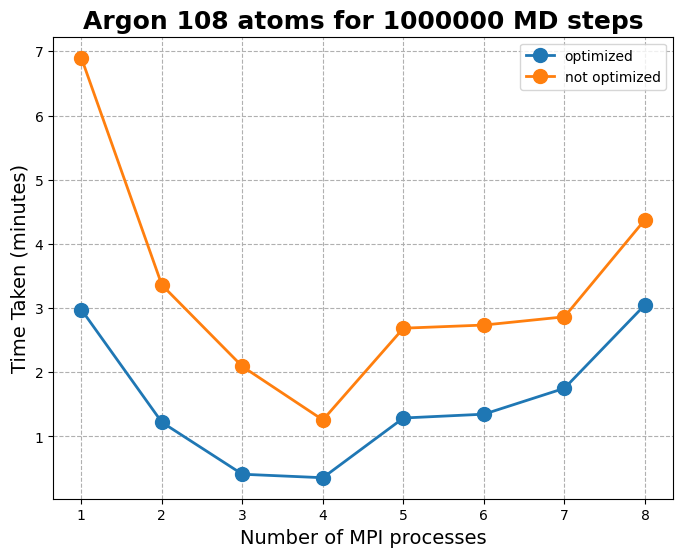

In [23]:

import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = list(range(1, 9))
y_values = {
    "optimized": [178.593, 73.244, 24.662, 21.393, 77.220, 80.795, 105.020, 183.030],
    "not optimized": [414.056, 201.598, 125.394, 75.415, 161.190, 164.125, 171.829, 262.635],
}
# Replace with actual time measurements it is in seconds
# convert to minutes
for key in y_values:
    y_values[key] = [x / 60 for x in y_values[key]]

# Define colors:
colors = {
    "optimized": 'tab:blue',
    "not optimized": 'tab:orange',
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot 
for (key, value) in y_values.items():
    ax.plot(x_values, value, marker='o', linewidth=2, markersize=10, label=f"{key}")


# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Number of MPI processes', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
# ax.set_ylim(bottom=0, top=30)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)

# Set the chart title and font size
ax.set_title('Argon 108 atoms for 1000000 MD steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Save the chart
plt.savefig('figs/mpi_argon_108.png')

# Add a legend
ax.legend( loc='best', fontsize=10)

# Show the chart
plt.show()




The plot above illustrates the time taken in minutes to run the Argon simulation with 108 atoms using 1,000,000 steps for both the optimized (blue) and non-optimized (orange) versions. As expected, the optimized version runs faster than the non-optimized version. However, the time behavior is the same for both implementations.

As the number of processes is increased from 1 to 4, the code runs faster, but beyond 5 processes, the execution time becomes slower. This is because the messaging passing required by MPI, which coordinates parallel processing, takes longer than the time saved by computing processes in parallel. It's important to note that the communication time increases with the number of processes, leading to a monotonically increasing execution time beyond 5 processes. Notably, there's a significant performance drop between 7 and 8 processes that's not entirely due to communication time. Since the program is running on an 8-core machine, it competes for resources with other OS applications. Therefore, the system's limitations also contribute to the slowdown.


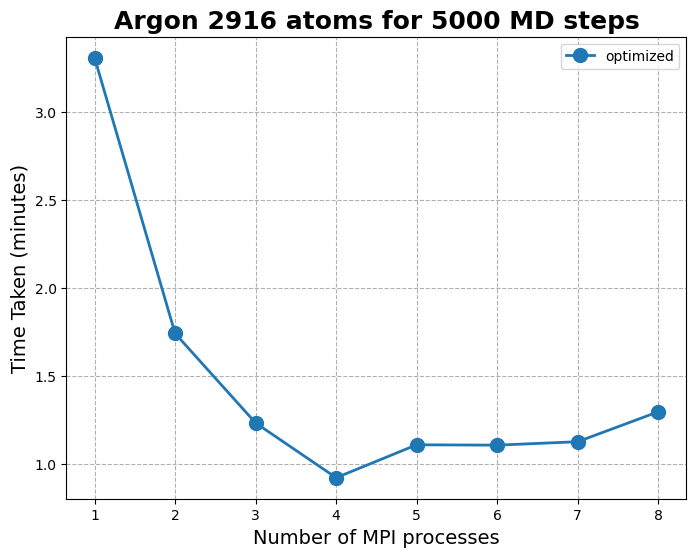

In [24]:

import matplotlib.pyplot as plt

# Define the x and y values for the line chart
x_values = list(range(1, 9))
y_values = {
    "optimized": [198.345, 104.486, 74.008, 55.365, 66.576, 66.453, 67.624, 77.810],
}
# Replace with actual time measurements it is in seconds
# convert to minutes
for key in y_values:
    y_values[key] = [x / 60 for x in y_values[key]]

# Define colors:
colors = {
    "optimized": 'tab:blue',
}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot 
for (key, value) in y_values.items():
    ax.plot(x_values, value, marker='o', linewidth=2, markersize=10, label=f"{key}")


# Set the x-axis and y-axis labels and limits
ax.set_xlabel('Number of MPI processes', fontsize=14)
ax.set_ylabel('Time Taken (minutes)', fontsize=14)
# ax.set_ylim(bottom=0, top=30)

# Set the x-axis tick labels and font size
ax.set_xticks(x_values)

# Set the chart title and font size
ax.set_title('Argon 2916 atoms for 5000 MD steps', fontsize=18, fontweight='bold')

# Add grid lines
ax.grid(True, linestyle='--')

# Add a legend
ax.legend( loc='best', fontsize=10)

# Save the chart
plt.savefig('figs/mpi_argon_2916.png')

# Show the chart
plt.show()



The plot above illustrates the time taken in minutes to run the Argon simulation with 2916 atoms using 5,000 steps for the optimized version. The pattern is analogous to the simulation with 108 atoms, except that the time does not decrease until we have 6 MPI processes. This is due to the larger number of atoms, which results in a bigger loop that can be efficiently parallelized across more processes until the communication time starts to impact the total time. Thus, using a higher number of processes can provide better parallelization and optimize the simulation runtime for larger systems. 

Interestingly, we observe that the increase in time with the number of processes is not as significant as in the 108 atoms case. In that case, 8 processes had a worse performance than 1 process due to the larger communication time. However, the bigger loop in the 2916 atoms simulation makes parallelization still beneficial, even with a relatively poor communication time. We anticipate that the time will increase as we increase the number of processes, and the communication time will begin to exceed the computation time significantly.

# Parallelization openMP